In [34]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten, Conv2D
from keras.datasets import mnist

In [35]:
data = mnist.load_data()

In [36]:
type(data)

tuple

In [37]:
(X_train, Y_train), (X_test, Y_test) = data
X_train.shape

(60000, 28, 28)

In [38]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
print(X_train.shape)

(60000, 28, 28, 1)


In [39]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

In [40]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

Y_train.shape
print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [41]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [42]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy']) 

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               605824    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [46]:
model.fit(X_train, Y_train, epochs=10, batch_size=1000)

Epoch 1/10
60/60 [==============================] - 23s 365ms/step - loss: 3.9889e-04 - accuracy: 0.9979
Epoch 2/10
60/60 [==============================] - 22s 375ms/step - loss: 3.1982e-04 - accuracy: 0.9983
Epoch 3/10
60/60 [==============================] - 27s 445ms/step - loss: 2.9704e-04 - accuracy: 0.9984
Epoch 4/10
60/60 [==============================] - 22s 375ms/step - loss: 2.8312e-04 - accuracy: 0.9985
Epoch 5/10
60/60 [==============================] - 22s 374ms/step - loss: 2.7223e-04 - accuracy: 0.9985
Epoch 6/10
60/60 [==============================] - 22s 374ms/step - loss: 2.6062e-04 - accuracy: 0.9986
Epoch 7/10
60/60 [==============================] - 22s 372ms/step - loss: 2.4938e-04 - accuracy: 0.9987
Epoch 8/10
60/60 [==============================] - 26s 437ms/step - loss: 2.3922e-04 - accuracy: 0.9987
Epoch 9/10
60/60 [==============================] - 23s 375ms/step - loss: 2.3084e-04 - accuracy: 0.9988
Epoch 10/10
60/60 [==============================] - 22

In [47]:
scores = model.evaluate(X_test, Y_test)
print("Accuracy: ", scores[1]*100)

313/313 [==============================] - 3s 9ms/step - loss: 0.0017 - accuracy: 0.9890
Accuracy:  98.90000224113464


1/1 [==============================] - 0s 42ms/step
4


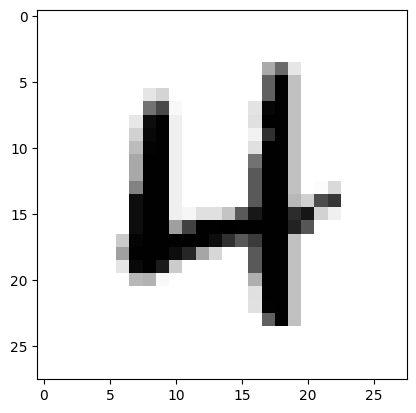

In [54]:
import matplotlib.pyplot as plt 
image_index = 533
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [55]:
model.save('model.h5')